In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import seaborn as sn
from sklearn.model_selection import train_test_split

from random import seed
seed(1)


import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ",keras.__version__)


kaggle = 0 # Kaggle active 1

if kaggle == 1 :
    MNIST_PATH= '../input/digit-recognizer'
else:
    MNIST_PATH= '../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer'



import os
for dirname, _, filenames in os.walk(MNIST_PATH): 
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

Tensorflow Version:  2.3.0
Keras Version:  2.4.0
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\sample_submission.csv
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\test.csv
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\train.csv


# Introduction - MNIST Training Competition
Link to the topic: https://www.kaggle.com/c/digit-recognizer/data

This is another Notebook to take a look into annother algorithm. Here I want to give the Deep Neural Network with the Framework Keras a try. As already mentioned in other notebooks, I will skip some explanations about the data set here. Moreover I will use the already discovered knowledge about the data and transform/prepare the data rightaway.

If you are interested in some more clearly analysis of the dataset take a look into my other notebooks about the MNIS-dataset:
- Another MNIST Try: https://www.kaggle.com/skiplik/another-mnist-try
- First NN by Detecting Handwritten Characters: https://www.kaggle.com/skiplik/first-nn-by-detecting-handwritten-characters
...




# Get Data

In [2]:
# Data path and file
#MNIST_PATH= '../input/digit-recognizer'
#MNIST_PATH= '../Another_MNIST_try/data/input/digit-recognizer'
CSV_FILE_TRAIN='train.csv'
CSV_FILE_TEST='test.csv'

def load_mnist_data(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    return pd.read_csv(csv_path)

def load_mnist_data_manuel(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    csv_file = open(csv_path, 'r')
    csv_data = csv_file.readlines()
    csv_file.close()
    return csv_data

def split_train_val(data, val_ratio):
    return 
    

train = load_mnist_data(MNIST_PATH,CSV_FILE_TRAIN)
test = load_mnist_data(MNIST_PATH,CSV_FILE_TEST)

In [3]:
y = train['label'].copy()
X = train.drop(['label'], axis=1)

X_test = test.copy()

## Train / Val Split

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=43, test_size=0.25)

In [5]:
print("X: ", X.shape)
print("X_train: ", X_train.shape)
print("X_val: ", X_val.shape)

print("y_train: ", y_train.shape)
print("y_val: ", y_val.shape)

X:  (42000, 784)
X_train:  (31500, 784)
X_val:  (10500, 784)
y_train:  (31500,)
y_val:  (10500,)


## Building Transforming Piplines

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('normalizer', Normalizer())
    #('std_scalar',StandardScaler())
])

In [7]:
X_train_prep = pipeline.fit_transform(X_train)      # fitting the pipeline to the train and transform it
X_val_prep = pipeline.transform(X_val)              # transform val data with this information

# Building a Deep Neural Network
## Model Architecture

In [8]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

model = keras.models.Sequential()

model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"] 
)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 419,110
Trainable params: 419,110
Non-trainable params: 0
_________________________________________________________________


## Model Visualization with Tensorboard (not for Kaggle)

In [10]:
root_logdir = "../../tensorboard-logs"
#os.chdir("../Juypter-workspace/digit_recognition_with_a_deep_neural_network")

print("Relative root_logdir: ",root_logdir)

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

Relative root_logdir:  ../../tensorboard-logs


In [11]:
run_logdir = get_run_logdir()

print("Current run logdir for Tensorboard: ", run_logdir)

Current run logdir for Tensorboard:  ../../tensorboard-logs\run_2021_08_04-09_37_49


### Keras Callbacks for Tensorboard
With Keras there is a way of using Callbacks for the Tensorboard to write log files for the board and visualize the different graphs (loss and val curve)


In [12]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

## Model Training

In [13]:
history = model.fit(X_train_prep, y_train, epochs=150, validation_data=(X_val_prep, y_val), callbacks=[tensorboard_cb] )

Epoch 1/150
  1/985 [..............................] - ETA: 0s - loss: 2.3066 - accuracy: 0.0625WARNING:tensorflow:From D:\anaconda3\envs\wingpuflake_keras\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
985/985 [==============================] - 2s 2ms/step - loss: 2.2386 - accuracy: 0.3557 - val_loss: 2.1296 - val_accuracy: 0.5293
Epoch 2/150
985/985 [==============================] - 2s 2ms/step - loss: 1.7099 - accuracy: 0.6158 - val_loss: 1.1895 - val_accuracy: 0.6738
Epoch 3/150
985/985 [==============================] - 2s 2ms/step - loss: 0.8763 - accuracy: 0.7643 - val_loss: 0.6894 - val_accuracy: 0.8115
Epoch 4/150
985/985 [==============================] - 2s 2ms/step - loss: 0.5924 - accuracy: 0.8316 - val_loss: 0.5328 - val_accuracy: 0.8459
Epoch 5/150
985/985 [==============================

### Visualization of the first Train Loss Curves

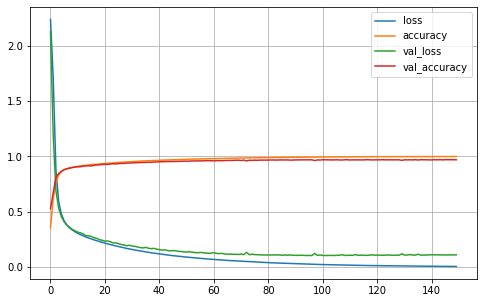

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize =(8,5))
plt.grid(True)

# Image Prediction of Unknown Data (Test Data)

## Peparing Test Data

In [15]:
X_test_prep = pipeline.transform(X_test)

In [16]:
X_test_prep

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Creating Competition File

In [17]:
mnist_competition_file = pd.DataFrame(columns=['ImageId','Label'])

## Prediction of Testdata

In [18]:
print("Propability of all lables for given pixels: ", model.predict(X_test_prep[1].reshape(1,-1)))

Propability of all lables for given pixels:  [[9.9999499e-01 2.6568248e-11 2.2298743e-06 1.8191459e-10 1.4954306e-13
  2.4893773e-06 6.8518133e-08 1.3152025e-07 2.9100644e-11 3.1003439e-10]]


In [19]:
print("Predicted Digit: ",np.argmax(model.predict(X_test_prep[1].reshape(1,-1))))

Predicted Digit:  0


In [20]:
i = 1
for row in X_test_prep:
    index = i
    predicted_label = np.argmax(model.predict(row.reshape(1,-1)))

    mnist_competition_file = mnist_competition_file.append({'ImageId': index, 'Label': predicted_label}, ignore_index = True )
    i = i + 1
    pass

In [21]:
mnist_competition_file

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [22]:
mnist_competition_file.ImageId = mnist_competition_file.ImageId.astype(int)
mnist_competition_file.Label = mnist_competition_file.Label.astype(int)

In [23]:
mnist_competition_file.to_csv('mnist_submission.csv', index=False)